/Users/ferradans/anaconda3/lib/python3.5/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/ferradans/anaconda3/lib/python3.5/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


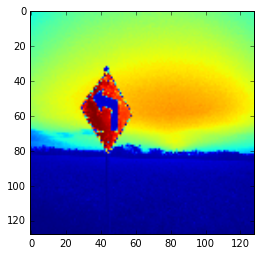

(128, 128)

In [1]:
from skimage.transform import resize
from skimage.util import img_as_float
from skimage import data
import matplotlib.pylab as plt 
%matplotlib inline
import mpld3
mpld3.enable_notebook()

from scipy import ndimage as ndi
import numpy as np

# Load data 
N=128
path = '/Users/ferradans/Regain/data/data_challenge_train_set/0000053.jpg'
image = img_as_float(data.load(path))
image = np.float32(resize(image[:,:,1],[N,N])/255.)

plt.imshow(image)
plt.show()

#.. and set parameters
image.shape


In [2]:
from skimage.color.colorconv import rgb2yuv

I = []
I.append(image[np.newaxis,np.newaxis,:,:])
I.append(image[np.newaxis,np.newaxis,:,:])
I.append(image[np.newaxis,np.newaxis,:,:])
I=np.concatenate(I,axis=1)
print(I.shape)
I=I.transpose((3,2,0,1))
Iyuv=rgb2yuv(I)
Iyuv.shape

(1, 3, 128, 128)


(128, 128, 1, 3)

max full res. 0.000274713994146  max non-full. 0.000282678130577


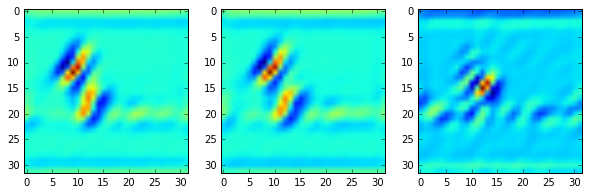

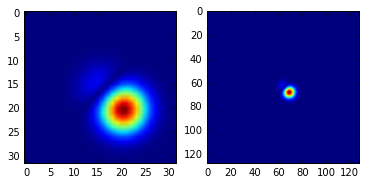

In [46]:
#testing subsampling: subsampling(x) conv Psi_j^res=j ==? subsample(x conv Psi_j)
from scattering.scattering import subsample
from scattering.filter_bank import filter_bank_morlet2d, filterbank_to_multiresolutionfilterbank
import time
import numpy as np
N = 128
J=np.log2(N)
L=8
m=2
#wavelet_filters,littlewood = filter_bank_morlet2d(N,J=J,L=L)
#Filters = filterbank_to_multiresolutionfilterbank(wavelet_filters,J)

j1=1
l = 1
image_badlimited = np.abs(np.fft.ifft2(np.fft.fft2(image)* Filters['psi'][0][j1][l,:,:]))

j = j1+2
resolution = j-1

#subsample( Image )_res=j conv Filter_res=j 
sub_X = np.fft.fft2(subsample(image_badlimited[np.newaxis,np.newaxis,:,:],resolution))
sub_x_filt= np.real(np.fft.ifft2(sub_X[0,0,:,:] * Filters['psi'][resolution][j][l,:,:]))

#subsample( Image_res=0 conv Filter_res=0 )
sub_X2 = np.fft.ifft2(np.fft.fft2(image_badlimited)* Filters['psi'][0][j][l,:,:])
sub_x2_filt= np.real(subsample(sub_X2[np.newaxis,np.newaxis,:,:],resolution))

plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(sub_x2_filt[0,0,:,:]) #no high freqs?
#plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(sub_x_filt)#np.fft.fftshift(np.abs(np.fft.fft2(
#plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(sub_x2_filt[0,0,:,:]-sub_x_filt)
#plt.colorbar()

print('max full res.',sub_x2_filt.max(),' max non-full.',sub_x_filt.max() )
sub_x_filt.max()/sub_x2_filt.max()

plt.show()
plt.subplot(1,2,1)
plt.imshow(np.fft.fftshift(np.abs(Filters['psi'][resolution][j][l,:,:])))

plt.subplot(1,2,2)
plt.imshow(np.fft.fftshift(np.abs(Filters['psi'][0][j][l,:,:])))


In [71]:
sub_x2_filt.shape

(1, 1, 64, 64)

2


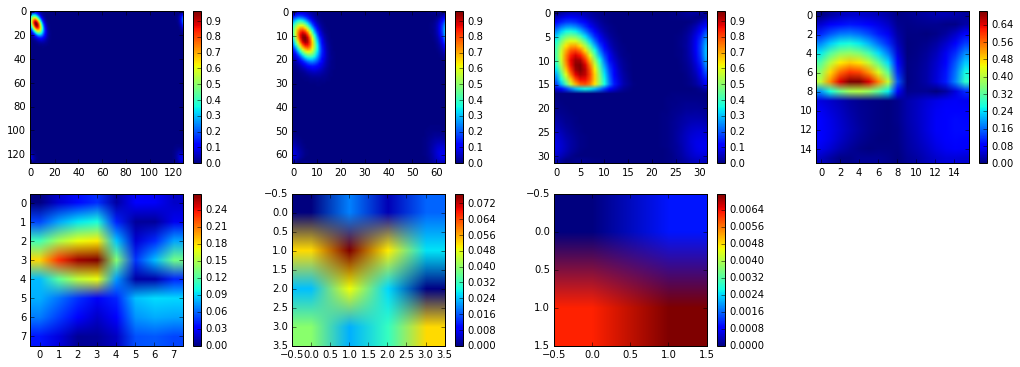

In [41]:
plt.figure(figsize=(18,6))
print(j)
for res in np.arange(0,J):
    plt.subplot(2,4,res+1)
    plt.imshow(np.abs(Filters['psi'][res.astype('int')][j][l,:,:]))
    plt.colorbar()

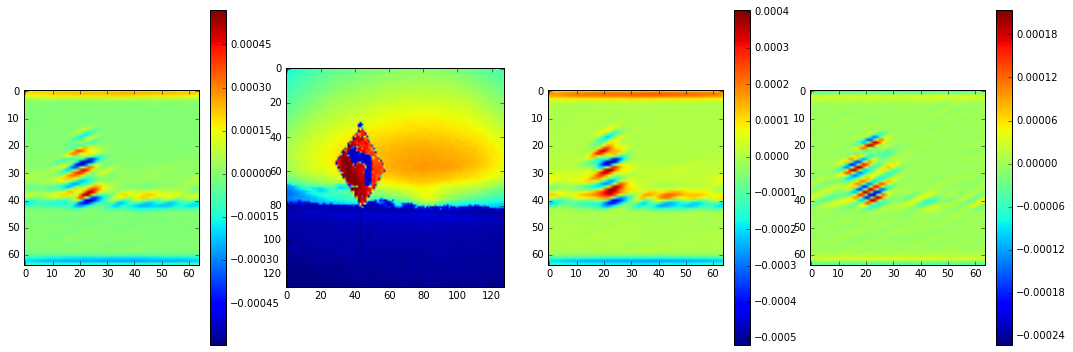

In [33]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
plt.imshow(sub_x_filt)
plt.colorbar()
plt.subplot(1,4,2)
plt.imshow(image)
plt.subplot(1,4,3)
plt.imshow(sub_x2_filt[0,0,:,:])
plt.colorbar()
plt.subplot(1,4,4)
plt.imshow(sub_x2_filt[0,0,:,:]-sub_x_filt)
plt.colorbar()

plt.show()

17.9337225508
1.06457025678
0.00392157


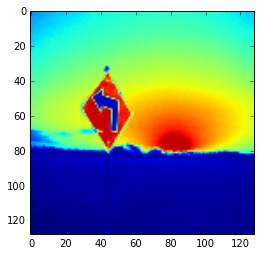

In [7]:
import h5py

fo = h5py.File("../scat_image.mat",'r')
scat = np.array(fo['S']).transpose(2,1,0)
im_matlab = np.array(fo['im']).transpose(1,0)
fo.close()

print(np.linalg.norm(S-scat)/np.linalg.norm(S))
plt.imshow(im_matlab)
print(im_matlab.max())
print(image.max())

In [8]:
from scattering.scattering import scattering
from scattering.filter_bank import filter_bank_morlet2d, filterbank_to_multiresolutionfilterbank
import time
import numpy as np
N = 128
J=np.log2(N)
L=4
m=2
wavelet_filters,littlewood = filter_bank_morlet2d(N,J=J,L=L)
Filters = filterbank_to_multiresolutionfilterbank(wavelet_filters,J)

start = time.time()
S,u = scattering(im_matlab[np.newaxis,:,:], Filters,m)
end = time.time()
print('One image processed in: ',end-start)

J= 7  L= 4  num_signals= 1  spatial_coefs= 2
size Sview[ 0 ]= (1, 7, 4, 2, 2)
size U[ 0 ]= (1, 4, 128, 128)
size Sview[ 1 ]= (1, 7, 4, 2, 2)
size U[ 1 ]= (1, 4, 128, 128)
size Sview[ 2 ]= (1, 7, 4, 2, 2)
size U[ 2 ]= (1, 4, 64, 64)
size Sview[ 3 ]= (1, 7, 4, 2, 2)
size U[ 3 ]= (1, 4, 32, 32)
size Sview[ 4 ]= (1, 7, 4, 2, 2)
size U[ 4 ]= (1, 4, 16, 16)
size Sview[ 5 ]= (1, 7, 4, 2, 2)
size U[ 5 ]= (1, 4, 8, 8)
size Sview[ 6 ]= (1, 7, 4, 2, 2)
size U[ 6 ]= (1, 4, 4, 4)
One image processed in:  0.4279448986053467


In [19]:
print((1+J*L)*4)
print((1+J*L+J*(J-1)*L*L/2))
S.shape

116.0
365.0


(1, 365, 2, 2)

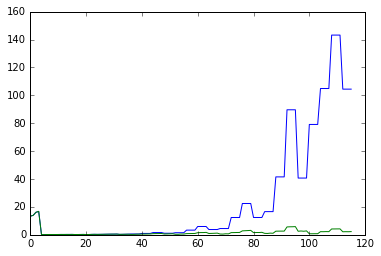

In [23]:
smr = S.reshape(365*4,1)
smr = smr[0:116]
smt = scat.reshape(365*4,1)
smt = smt[0:116]
np.arange(0,smr.shape[1]).shape
smr.shape
plt.plot(np.arange(0,smr.shape[0]),smr, np.arange(0,smt.shape[0]),smt )

(365, 2, 2)

/Users/ferradans/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Users/ferradans/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


20.0944618718


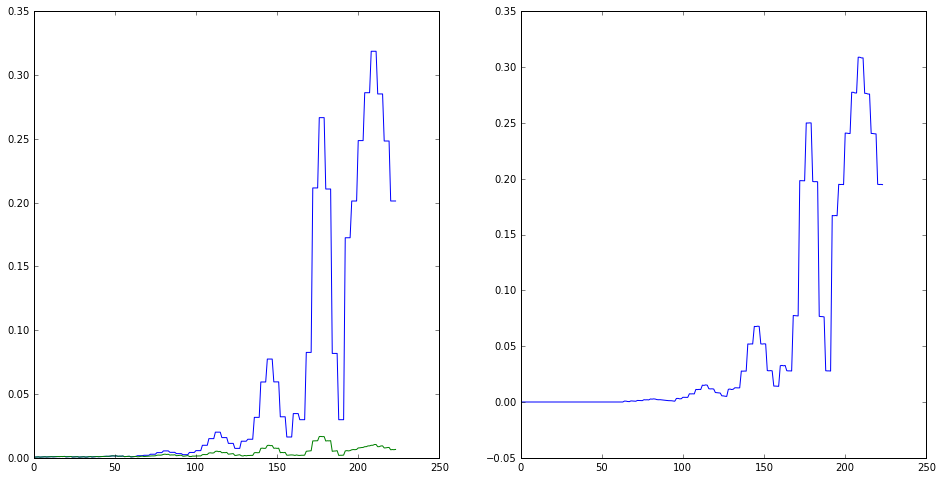

In [98]:
v = S[0,1:J*L+1,:,:]
indx = 224
v.shape = (v.shape[0]*v.shape[2]*v.shape[1],1)
v2 = scat[0,1:J*L+1,:,:]
v2.shape = (v2.shape[0]*v2.shape[2]*v2.shape[1],1)
print(np.linalg.norm(v-v2)/np.linalg.norm(v2))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(np.arange(indx),v,np.arange(indx),v2)
plt.subplot(1,2,2)
plt.plot(np.arange(indx),v-v2)

plt.show()

In [60]:
import h5py

#f = h5py.File("saveexample.h5","w")
#f.create_dataset('scattering',data=S)
#f.close()

fo = h5py.File("saveexample.h5",'r')
scat = np.array(fo['scattering'])
fo.close()

print(np.linalg.norm(S-scat)/np.linalg.norm(S))


0.954488116257


In [1]:
from scattering.scattering.filter_bank import get_filter_at_resolution

Phi_multires = []
Psi_multires = []

J = len(wavelet_filters['psi']) #scales
L = len(wavelet_filters['psi'][0]) #angles
N = wavelet_filters['psi'][0].shape[0] #size at max scale


for res in np.arange(0,J).astype('int'):
    Phi_multires.append(get_filter_at_resolution(wavelet_filters['phi'][0,:,:],res))

    aux_filt_psi = np.ndarray((J,L,N/2**res,N/2**res))
    for j in np.arange(0,J).astype('int'):
        for l in np.arange(0,L).astype('int'):
            aux_filt_psi[j,l,:,:] = get_filter_at_resolution(wavelet_filters['psi'][j][l,:,:],res)

    Psi_multires.append(aux_filt_psi)





NameError: name 'wavelet_filters' is not defined

In [11]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

(50000, 3, 32, 32)

In [2]:
from scattering.scattering.filter_bank import get_filter_at_resolution
Psi = []
for res in np.arange(0,J):
    aux_filt_psi = np.ndarray((J,1,N/2**res,N/2**res))
    for j in np.arange(0,J).astype('int'):
        l=0
        aux_filt_psi[j,0,:,:] = get_filter_at_resolution(wavelet_filters['psi'][j][l,:,:],res)
        print('res',res,' j',j,' l',l,' size:',aux_filt_psi.shape)
    Psi.append(aux_filt_psi)

res 0.0  j 0  l 0  size: (7, 1, 128, 128)
res 0.0  j 1  l 0  size: (7, 1, 128, 128)
res 0.0  j 2  l 0  size: (7, 1, 128, 128)
res 0.0  j 3  l 0  size: (7, 1, 128, 128)
res 0.0  j 4  l 0  size: (7, 1, 128, 128)
res 0.0  j 5  l 0  size: (7, 1, 128, 128)
res 0.0  j 6  l 0  size: (7, 1, 128, 128)
res 1.0  j 0  l 0  size: (7, 1, 64, 64)
res 1.0  j 1  l 0  size: (7, 1, 64, 64)
res 1.0  j 2  l 0  size: (7, 1, 64, 64)
res 1.0  j 3  l 0  size: (7, 1, 64, 64)
res 1.0  j 4  l 0  size: (7, 1, 64, 64)
res 1.0  j 5  l 0  size: (7, 1, 64, 64)
res 1.0  j 6  l 0  size: (7, 1, 64, 64)
res 2.0  j 0  l 0  size: (7, 1, 32, 32)
res 2.0  j 1  l 0  size: (7, 1, 32, 32)
res 2.0  j 2  l 0  size: (7, 1, 32, 32)
res 2.0  j 3  l 0  size: (7, 1, 32, 32)
res 2.0  j 4  l 0  size: (7, 1, 32, 32)
res 2.0  j 5  l 0  size: (7, 1, 32, 32)
res 2.0  j 6  l 0  size: (7, 1, 32, 32)
res 3.0  j 0  l 0  size: (7, 1, 16, 16)
res 3.0  j 1  l 0  size: (7, 1, 16, 16)
res 3.0  j 2  l 0  size: (7, 1, 16, 16)
res 3.0  j 3  l 0  size: (

/Users/ferradans/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ferradans/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: ComplexWarning: Casting complex values to real discards the imaginary part


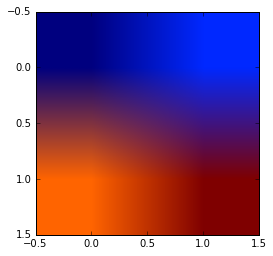

In [7]:
plt.imshow(S[0,0,:,:])
plt.show()

In [6]:
x=image[np.newaxis,:,:]
len(wavelet_filters['psi'])
x.shape[-1]/2**J

1.0

In [ ]:
indx = 0
plt.figure(figsize=(8,16))
for j in np.arange(0,len(u)):
    for l in np.arange(u[j].shape[1]):
        plt.subplot(len(u),4,indx+1);
        plt.imshow(u[j][0,l,:,:])
        indx +=1
plt.show()

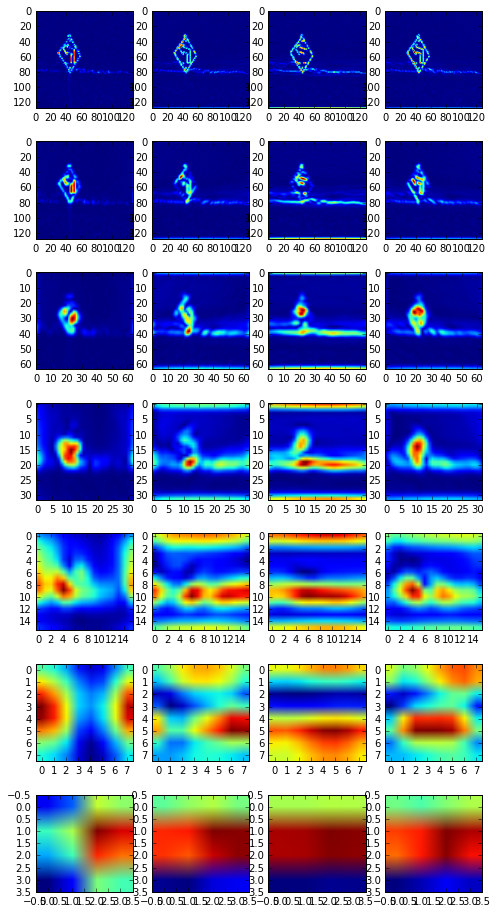

In [30]:
indx = 0
plt.figure(figsize=(8,16))
for j in np.arange(0,len(u)):
    for l in np.arange(u[j].shape[1]):
        plt.subplot(len(u),4,indx+1);
        plt.imshow(u[j][0,l,:,:])
        indx +=1
plt.show()


In [ ]:
# %load test_scattering_for_comparison.py
from scipy import ndimage as ndi
import numpy as np
import scatterpyllar.scatterpyllar.filters.morlet as spf
import scatterpyllar.scatterpyllar.core.scattering_transform as sp

fb = spf.fourier_multires(N, J=J, L=L, fft_choice='fftpack_lite')

Sivan, scr = sp.scattering_transform(image, fb)

from filter_bank import filter_bank_morlet2d
from scattering import scattering
wavelet_filters,littlewood = filter_bank_morlet2d(N,J=J,L=L)
S,U = scattering(image[np.newaxis,],wavelet_filters)

#from  filter_bank_testing import filter_bank_morlet2d_testing
#wavelet_filters_testing,littlewood = filter_bank_morlet2d_testing(N,J=J,L=L)
#Stesting,U = scattering(image[np.newaxis,],wavelet_filters_testing)


In [ ]:
plt.subplot(1,2,1)
plt.imshow(np.abs(wavelet_filters['phi'][0]))
plt.subplot(1,2,2)
plt.imshow(np.abs(wavelet_filters_testing['phi'][0]))
plt.show()

print(np.linalg.norm(wavelet_filters['phi'][0]-wavelet_filters_testing['phi'][0]))

v = Sivan['all_values'][0:J*L,:,:]
v.shape
Stesting[0].shape
plt.subplot(1,2,1)
plt.imshow(np.abs(wavelet_filters['psi'][0][0,:,:]))
plt.subplot(1,2,2)
plt.imshow(np.abs(wavelet_filters_testing['psi'][0][0,:,:]))
plt.show()
print(np.linalg.norm(wavelet_filters['psi'][0][0,:,:]-wavelet_filters_testing['psi'][0][0,:,:]))


In [ ]:
v=Sivan['all_values'][0:L,:,:]
vv = S[0][0:L,:,:]
w = Stesting[0][0:L,:,:]
print(w.shape)
print(vv.shape)
#print("vv=",np.linalg.norm(vv-v))
#print("W=",np.linalg.norm(w-v))

print(np.linalg.norm(v-w))
print(np.linalg.norm(vv-w))
print(np.linalg.norm(vv-v))

In [ ]:
indx = J*L+2

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(np.abs(Sivan['all_values'][indx,:,:]))
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.abs(S[0][indx,:,:]))
plt.colorbar()
plt.show()
print( np.linalg.norm(Sivan['all_values']-S[0]) )
print(Sivan['all_values'][indx,:,:])
print(S[0][indx,:,:])

In [ ]:
indxini = J*L+1
indxfin = J*L+1+J*(J-1)*L**2/2
v_ivan = Sivan['all_values'][indxini:indxfin,:,:]
v_ivan.shape=(v_ivan.shape[0]*4,1)
v_mi = S[0][indxini:indxfin,:,:]
v_mi.shape=(v_mi.shape[0]*4,1)
plt.plot(np.real(v_ivan)/10**(-3),np.real(v_mi)/10**(-3),'*')


In [ ]:
def apply_fourier_mult(signals,filters):
# Assume signals and filters are in the Fourier domain
# and the dimensions are:
# - signals: (num_signals, N,N) (color images can be stacked in the num_signals)
# - filters: [L,N,N] where L is the num. of filters to apply

# Goal pointwise multiplication

    L = filters.shape[0]
    N = filters.shape[1]
    num_samples = signals.shape[0]

    #  filtered_signals = np.ndarray(num_samples,L,N,N)
    #TODO: SELECT THE CORRECT AMOUNT ACCORDING TO THE SUBSAMPLING, and control the size

    filtered_signals=signals[:,np.newaxis,:,:] * filters[np.newaxis,:,:,:]

    return filtered_signals

In [ ]:
#test subsampling and low pass filter
def apply_lowpass(img, phi, J, N_scat):

    # NB: I could compute N_scat here, but in case we want to oversample, this
    # may be useful. I should make a class.
    N_nolp = img.shape[-1]
    
    N_nolp_r = N_nolp//2 + 1
    dsf = N_nolp / N_scat

    # out will in the end point to a downsampled lowpassed image
    # out = ifft(fft(img, axis=1)
    #    * phi[0, :].reshape(1, N_nolp), axis=1)[:, ::dsf]

    # TO DO: use real transforms
    out = np.zeros((img.shape[:-1]+(N_nolp_r,1)))
    out.shape = out.shape[:-1]
    #out = np.zeros((img.shape[0],img.shape[1], N_nolp_r))
    out[:] = np.fft.rfft(img, axis=-1) * phi[0, :N_nolp_r].reshape(1, N_nolp_r)

    out = np.fft.irfft(out, axis=-1)[..., ::dsf].copy()
    
    print(out.shape)
    print(N_nolp_r)
    out = np.fft.rfft(out, axis=-2) * phi[:N_nolp_r, 0].reshape(N_nolp_r, 1)
    out = np.fft.irfft(out, axis=-2)[...,::dsf, :]
    out = 2**(J - 1) * np.real(out)

    return out


In [4]:
images_db = []
images_db.append(image[np.newaxis,:,:])
images_db.append(image[np.newaxis,:,:])

images_db = np.concatenate(images_db,axis=0)

J = np.log2(N)
spatial_coefs=images_db.shape[1]/2**(J-1)

print(images_db.shape)
#S = apply_lowpass(images_db, wavelet_filters['phi'][0], J,  spatial_coefs)

S,U = scattering(images_db,wavelet_filters)
S.shape

(2, 128, 128)


/Users/ferradans/Documents/Research/ScatteringPython/scattering/scattering/scattering.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  out[:] = np.fft.rfft(img, axis=-1) * phi[0, :N_nolp_r].reshape(1, N_nolp_r)


(2, 365, 2, 2)

In [ ]:
img = U[j]
phi = wavelet_filters['phi'][0]
N_nolp = img.shape[-1]
N_nolp_r = N_nolp//2 + 1
dsf = N_nolp / spatial_coefs
    
out = np.zeros((img.shape[:-1]+(N_nolp_r,1)))
out.shape = out.shape[:-1]
out[:] = np.fft.rfft(img, axis=-1) * phi[0, :N_nolp_r].reshape(1, N_nolp_r)
print(np.fft.irfft(out, axis=-1).shape)
out = np.fft.irfft(out, axis=-1)[..., ::dsf].copy()
print(aa.shape)
print(out.shape)

In [ ]:
X = np.fft.fft2(image[np.newaxis,]) # precompute the fourier transform of the images
U=[]
spatial_coefs = N/ 2**(J-1)

Sview = np.zeros((1,J,L,2,2))
for j in np.arange(J):
    filtersj = wavelet_filters['psi'][j].view()
    print(filtersj.shape)
    print(X.shape)
    # fft2(| x conv Psi_j |)
    U.append( np.abs(np.fft.ifft2(apply_fourier_mult(X,filtersj))))
    print(U[j].shape)
    Sview[:,j,:,:,:] = apply_lowpass(U[j], wavelet_filters['phi'][0], J,  spatial_coefs)


In [ ]:
out = np.zeros((U[1].shape[0],U[1].shape[-1], 3))
out.shape

In [ ]:
def apply_lowpass_simple(img, phi, J, N_scat):

    # NB: I could compute N_scat here, but in case we want to oversample, this
    # may be useful. I should make a class.

    Phi = np.fft.ifft2(phi)
    Phi = np.fft.rfft(Phi,axis=0)
    phi = np.fft.rfft(Phi,axis=1)

    N_nolp = img.shape[1]
    N_nolp_r = N_nolp//2 + 1
    dsf = N_nolp / N_scat

    Img = np.fft.rfft(img,axis=1)
    Img = np.fft.rfft(Img,axis=2)
    
    Img *= phi
    
    Img = np.fft.irfft(Img,axis=1)
    img = np.fft.irfft(Img,axis=2)
    
    out = 2**(J - 1)*np.real(img[:,::dsf,::dsf])
    """   
    out = np.zeros((img.shape[0],img.shape[1], N_nolp_r))
    out[:] = np.fft.rfft(img, axis=2) * phi[0, :N_nolp_r].reshape(1, N_nolp_r)


    out = np.fft.irfft(out, axis=2)[:,:, ::dsf].copy()
    out = np.fft.rfft(out, axis=1) * phi[:N_nolp_r, 0].reshape(N_nolp_r, 1)
    out = np.fft.irfft(out, axis=1)[:,::dsf, :]
    out = 2**(J - 1) * np.real(out)
    """
    return out

In [ ]:
spatial_coefs = N/ 2**(J-1)
S= apply_lowpass(image[np.newaxis,], wavelet_filters['phi'][0], J,  spatial_coefs)
Simple = apply_lowpass_simple(image[np.newaxis,], wavelet_filters['phi'][0], J,  spatial_coefs)
print(Simple)
print(S) # not the same output!! guess our filter is not completely separable
print(np.linalg.norm(S-v))
print(S)
print(v) 

In [ ]:
plt.plot(np.abs(wavelet_filters['phi'][0][0,:]))
plt.plot(np.abs(wavelet_filters['phi'][0][:,0]))
plt.show()

In [ ]:
rfft = np.fft.rfft
irfft = np.fft.irfft

phi = fb['phi'][0]

N_scat=2 ** (np.log2(N) - (J - 1)) 
N_nolp = image.shape[0]
N_nolp_r = N_nolp//2 + 1
dsf = N_nolp / N_scat

# out will in the end point to a downsampled lowpassed image
# out = ifft(fft(img, axis=1)
#    * phi[0, :].reshape(1, N_nolp), axis=1)[:, ::dsf]

# TO DO: use real transforms

out = np.zeros((image.shape[0], N_nolp_r), dtype='complex64')

out[:] = rfft(image, axis=1) * phi[0, :N_nolp_r].reshape(1, N_nolp_r)

out = irfft(out, axis=1)[:, ::dsf].copy()
out = rfft(out, axis=0) * phi[:N_nolp_r, 0].reshape(N_nolp_r, 1)
out = irfft(out, axis=0)[::dsf, :]
out = 2**(J - 1) * np.real(out)
out

In [ ]:
plt.figure(figsize=(16,8))
indx = 1
plt.subplot(1,2,1)
plt.imshow(Sivan[indx,:,:]*100)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S[0][indx,:,:])
plt.colorbar()
plt.show()

In [ ]:
# %load scatterpyllar/test_scattering.py
import scatterpyllar.filters.morlet as spf
import scatterpyllar.core.scattering_transform as sp
import numpy as np
from scipy.misc import lena
import time
import cProfile

import sys
#import mkl_fft


N = 256
J = int(np.log2(N))
L = 12

t = np.arange(N).reshape(N, 1)

# Some deterministic signal to facilitate comparisons with the Matlab version:
x = np.float32(np.cos(t) * np.cos(t.T))


# Filter generation is faster than in the Matlab version
start_time = time.time()
# why doesn't mkl_fft work here?
fb = spf.fourier_multires(N, J=J, L=L, fft_choice='fftpack_lite')
print("--- %s seconds ---" % (time.time() - start_time))

# This is how you can get all the keys to index filters if you need it:
print('keys:',fb['psi'].keys()[:5])

# The actual transform is faster if we use mkl_fft
n_mc = 1
start_time = time.time()
for i in range(n_mc):
    S, scr = sp.scattering_transform(x, fb, fft_choice='fftpack_lite', localized=True)
print("--- %s seconds ---" % (time.time() - start_time))



# This is how you access coefficients in the second layer:
print('coefs S:', S['coeffs'][((0, 0),(3, 1),(5, 1))])


# So indexing is done by tuples of (j, l) tuples. The one above indexes the
# following path through layers:
#
# Layer 0: (0, 0) (this is always the same) 
# Layer 1: (3, 1) meaning j = 3 (note that j starts from 1!), and l = 1;
#                 unlike with j, l = 1 indexes the second rotation (first 
#                 one you get for l = 0)
# Layer 2: (5, 1) analogously


# This is how you access coefficients in the first layer:
#print S['coeffs'][((0, 0),(3, 1))]

# This is how you access the mean coeff in the zero-th layer (note the comma!):
#print S['coeffs'][((0, 0),)]





In [1]:
import h5py
import numpy as np
f = h5py.File('/Users/ferradans/Documents/Research/ScatteringPython/scattering/scatoneimage.mat')
matscat = np.array(f['feature']) #.transpose((2, 1, 0))
image = np.array(f['image']).transpose()
image.shape
gabor = np.array(f['gabor'])


In [2]:
#and compare with the matlab output

from scattering.scattering.scattering import scattering
from scattering.scattering.filter_bank import filter_bank_morlet2d
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline

N=32
J=3
L=6
m=1

wavelet_filters,littlewood = filter_bank_morlet2d(N,J=J,L=L,sigma_phi=0.6957,sigma_xi=0.8506)
S,u = scattering(image[np.newaxis,:,:], wavelet_filters,m)

ValueError: operands could not be broadcast together with shapes (1,6,16,16) (32,32) 

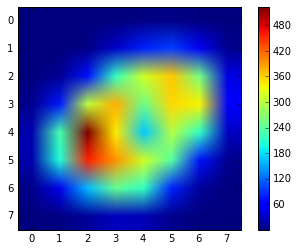

In [3]:
Smio = S
plt.imshow(S[0,0,:,:])
plt.colorbar()
plt.show()

In [16]:
for j in np.arange(0,J):
    for l in np.arange(L):

         print('j=',j,'l=',l,' mean=',np.real(wavelet_filters['psi'][j][l,:,:].mean()))

j= 0 l= 0  mean= 0.1348100909365486
j= 0 l= 1  mean= 0.13539914088767457
j= 0 l= 2  mean= 0.13539914088767457
j= 0 l= 3  mean= 0.13481009093654858
j= 0 l= 4  mean= 0.1353991408876746
j= 0 l= 5  mean= 0.13539914088767457
j= 1 l= 0  mean= 0.03385019090007116
j= 1 l= 1  mean= 0.03385019090007115
j= 1 l= 2  mean= 0.03385019090007115
j= 1 l= 3  mean= 0.033850190900071166
j= 1 l= 4  mean= 0.03385019090007116
j= 1 l= 5  mean= 0.03385019090007116
j= 2 l= 0  mean= 0.00846254772501779
j= 2 l= 1  mean= 0.008462547725017791
j= 2 l= 2  mean= 0.008462547725017791
j= 2 l= 3  mean= 0.00846254772501779
j= 2 l= 4  mean= 0.00846254772501779
j= 2 l= 5  mean= 0.00846254772501779


528
528
0.999985645571
(0.998802809236+0j)


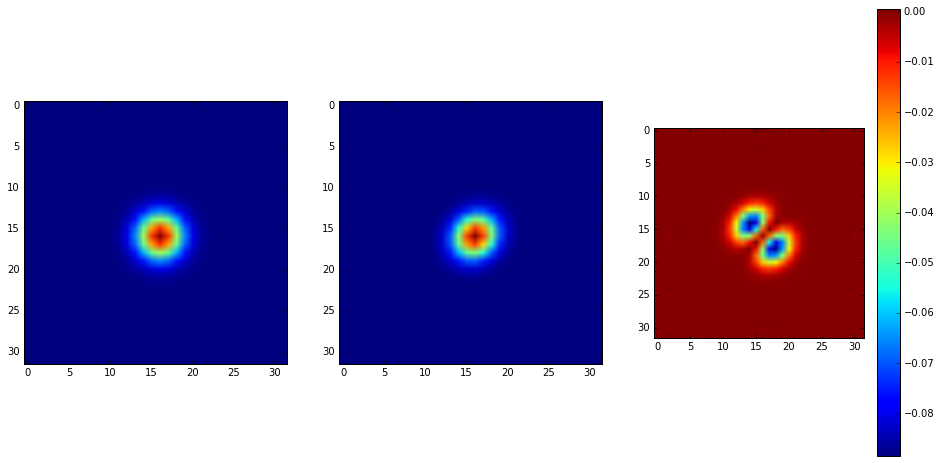

0.10547931076818209

In [6]:
gabor_mio = np.fft.fftshift(wavelet_filters['phi'][0,:,:])

print(np.fft.fftshift(gabor).argmax())
print(gabor_mio.argmax())

print(np.fft.fftshift(gabor).max())
print(gabor_mio.max())

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.imshow(np.fft.fftshift(gabor))
plt.subplot(1,3,2)
plt.imshow(np.real(gabor_mio))
plt.subplot(1,3,3)
plt.imshow(np.real(gabor_mio) - np.fft.fftshift(gabor) )
plt.colorbar()
plt.show()

np.linalg.norm(np.real(gabor_mio/gabor_mio.max()) - np.fft.fftshift(gabor/gabor.max()) )/ np.linalg.norm(gabor)

In [9]:
vv=vS[:]
vv.shape

(1, 127, 8, 8)

ValueError: x and y must have same first dimension

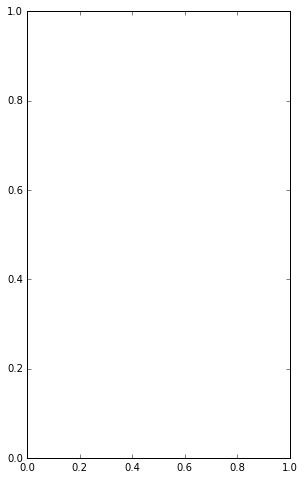

In [7]:
vS = S.transpose((0,1,3,2)).copy()
vS.shape = (8128,1)
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
n = 1000
plt.plot(np.arange(0,n),vS,np.arange(0,n),matscat)
plt.subplot(1,3,2)
plt.plot(np.arange(0,n),matscat)
plt.subplot(1,3,3)
plt.plot(np.arange(0,n),matscat[0:n]-vS[0:n])
plt.show()
np.linalg.norm(matscat[0:8128]-vS[0:8128])/np.linalg.norm(vS)

In [17]:
vv = Smio[0,0,:,:].transpose().copy()
vv.shape

(8, 8)

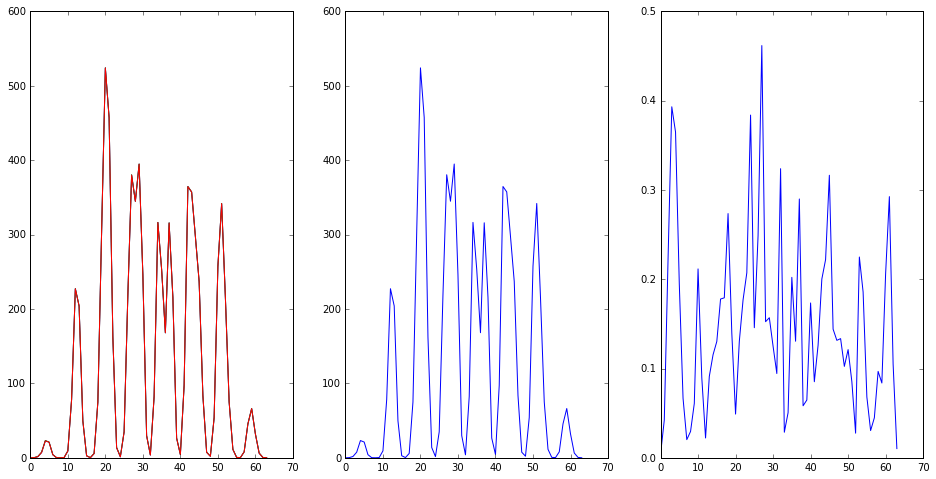

In [19]:
vv = Smio[0,0,:,:].transpose().copy()
vv.shape = (64,1)
vS = S[0,0,:,:].transpose().copy()
vS.shape = (64,1)
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.plot(np.arange(0,64),vS[0:64],np.arange(0,64),matscat[0:64],np.arange(0,64),vv[0:64])
plt.subplot(1,3,2)
plt.plot(np.arange(0,64),matscat[0:64])
plt.subplot(1,3,3)
plt.plot(np.arange(0,64),matscat[0:64]-vv[0:64])
plt.show()
np.linalg.norm(matscat[0:64]-vS[0:64])/np.linalg.norm(vS[0:64])

vS = S.transpose((0,1,3,2)).copy()


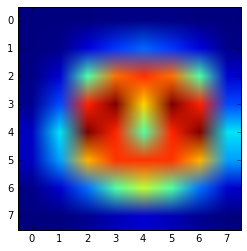

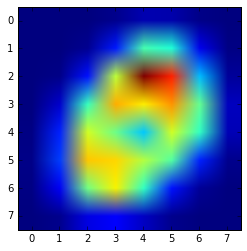

In [82]:
plt.imshow(vS[0:64].reshape(8,8))
plt.show()
plt.imshow(matscat[0:64].reshape(8,8))
plt.show()

In [9]:
im_mio=apply_lowpass(image, gabor, J, 8)
plt.imshow(im_mio)
plt.show()

NameError: name 'apply_lowpass' is not defined

In [12]:
2**(J-1)

4

/Users/ferradans/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ferradans/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


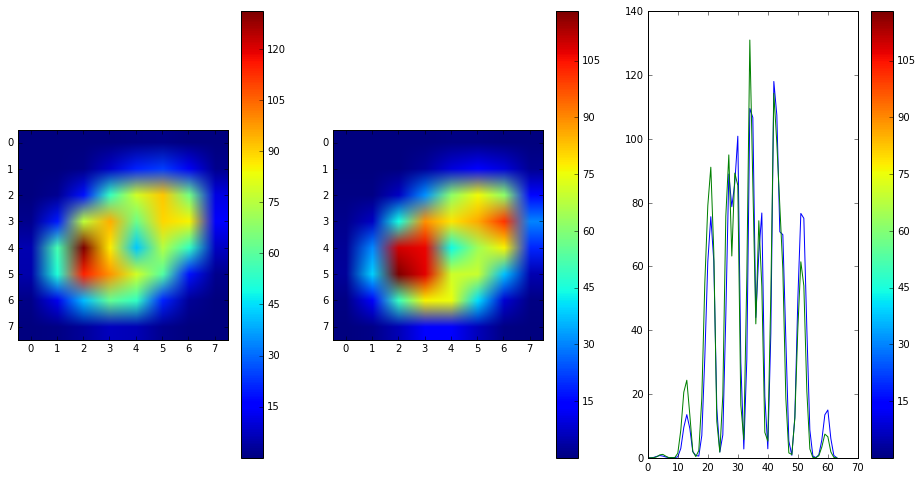

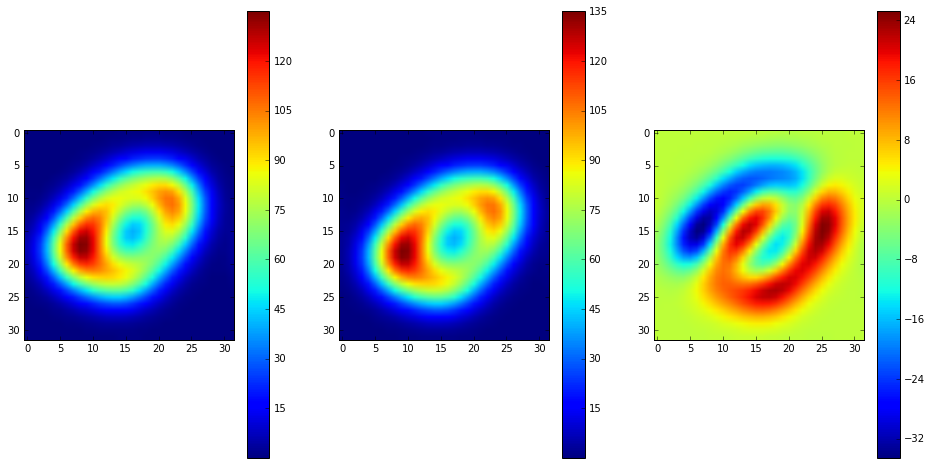

0.23348759237571012

In [10]:
gbazo_mio = np.real(np.fft.ifft2(np.fft.fft2(image)*np.fft.fftshift(gabor_mio)))
gbazo = np.real(np.fft.ifft2(np.fft.fft2(image)*gabor))

ds = 32/2**(J)
gbazo_mios = gbazo_mio[::ds,::ds].copy()
gbazos = gbazo[::ds,::ds].copy()
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.imshow(gbazo_mios)
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(gbazos)
plt.colorbar()
plt.subplot(1,3,3)

gbazos.shape =(64,1)
gbazo_mios.shape =(64,1)
plt.plot(np.arange(0,64),gbazos,np.arange(0,64),gbazo_mios[:])
plt.colorbar()
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.imshow(gbazo_mio)
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(gbazo)
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(gbazo-gbazo_mio)
plt.colorbar()
plt.show()
np.linalg.norm(gbazo-gbazo_mio)/np.linalg.norm(gbazo)

In [16]:
def ispow2(N):
    return 0 == (N & (N-1))
def crop_filter_for_subsampling(filt,j):
    
    cast = np.complex64
    N = filt.shape[0]  # filter is square
    
    assert ispow2(N), 'Filter size must be an integer power of 2.'
    
    J = int(np.log2(N))
    
    # NTM: 0.5 is a cute trick for higher dimensions!
    mask = np.hstack((np.ones(N / 2 ** (1 + j)), 0.5, np.zeros(N - N / 2 ** (j + 1) - 1))) \
    + \
    np.hstack(
    (np.zeros(N - N / 2 ** (j + 1)), 0.5, np.ones(N / 2 ** (1 + j) - 1)))
    
    mask.shape = N, 1
    
    filt_lp = filt * mask * mask.T
    if 'cast' in locals():
        filt_lp = cast(filt_lp)
    
    # Remember: C contiguous, last index varies "fastest" (contiguous in
    # memory) (unlike Matlab)
    fold_size = (2 ** j, N / 2 ** j, 2 ** j, N / 2 ** j)
    filt_multires = filt_lp.reshape(fold_size).sum(axis=(0, 2))
    
    
    return filt_multires


In [19]:
32/2**j

8.0

(128, 128)


NameError: name 'crop_filter_for_subsampling' is not defined

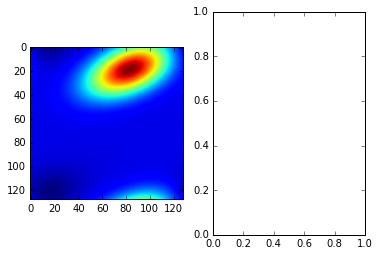

In [3]:
filt = wavelet_filters['psi'][0][-1,:,:]
print(filt.shape)
plt.subplot(1,2,1)
plt.imshow(np.real(filt))

j = 1
plt.subplot(1,2,2)
plt.imshow(np.real(crop_filter_for_subsampling(filt,j)))
plt.show()

In [2]:
import h5py,time
from scattering.scattering.scattering import apply_lowpass_fast, apply_lowpass, apply_lowpass_ivan
from scattering.scattering.filter_bank import filter_bank_morlet2d
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline
f = h5py.File('/Users/ferradans/Documents/Research/ScatteringPython/scattering/scatoneimage.mat')
matscat = np.array(f['feature']) #.transpose((2, 1, 0))
image = np.array(f['image']).transpose()
image.shape
#and compare with the matlab output
N=32
J=3
L=6
N_scat = N/2**(J) 
m=1

wavelet_filters,littlewood = filter_bank_morlet2d(N,J=J,L=L,sigma_phi=0.6957,sigma_xi=0.8506)
phi = wavelet_filters['phi']
Images = np.ndarray((3,N,N))
Images[0,:] = image
Images[1,:] = image
Images[2,]=image[np.newaxis,]

start = time.clock()
I = apply_lowpass(Images, phi, J, N_scat)
print('slow:',time.clock()-start)

start = time.clock()
Ifast = apply_lowpass_fast(Images, phi[0,:,:], J, N_scat)
print('fast:',time.clock()-start)
print(np.linalg.norm(I-Ifast)/np.linalg.norm(I))
#start = time.clock()
#Ifastivan = apply_lowpass_ivan(Images[0,:,:], phi[0,:,:], J, N_scat)
#print('fast ivan:',time.clock()-start)

slow: 0.0011330000000002727
fast: 0.0018329999999999735
0.00119719076449


In [2]:
Ifast.shape

(3, 4, 4)

In [79]:
aa = phi[0,0,0:17]
dsf = 2*(J-1)

start = time.clock()
bb = np.fft.rfft(Images,axis=-1)
c = np.fft.irfft(bb*aa,axis=-1)
bb = np.fft.rfft(np.real(c)[...,::dsf], axis=-2)
aa.shape = (17,1)
aa.shape
bb.shape

(2, 17, 8)

0.0013270000000034088
err: 0.00119862574817


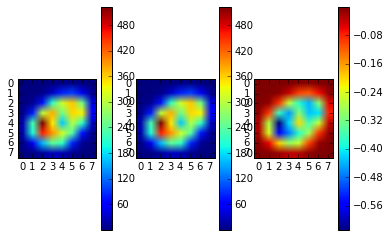

TypeError: Invalid dimensions for image data

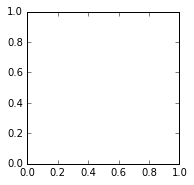

In [83]:
aa = phi[0,0,0:17]
dsf = 2*(J-1)

start = time.clock()
bb = np.fft.rfft(Images,axis=-1)
c = np.fft.irfft(bb*aa,axis=-1)
bb = np.fft.rfft(np.real(c)[...,::dsf], axis=-2)
aa.shape = (17,1)
c = np.real(2**(J-1)*np.fft.irfft(bb*aa,axis=-2)[...,::dsf,:])
end = time.clock()
print(end-start)
plt.subplot(1,3,1)
plt.imshow(c[0,:,:])
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(I[0,:,:])

plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(c[0,:,:]-I[0,:,:])

plt.colorbar()

print('err:',np.linalg.norm(c - I)/np.linalg.norm(c))

plt.show()
out = c
out.shape
plt.subplot(1,2,1)
plt.imshow(np.real(c[::dsf,::dsf]))
plt.subplot(1,2,2)
plt.imshow(np.real(I[0,:,:]))
I.shape

In [8]:
from scattering.scattering.scattering import apply_lowpass_fast, apply_lowpass, apply_lowpass_ivan
import time

start = time.clock()
I = apply_lowpass(image[np.newaxis,], phi, J, N_scat)
print('slow:',time.clock()-start)

start = time.clock()
Ifast = apply_lowpass_fast(image[np.newaxis,], phi[0,:,:], J, N_scat)
print('fast:',time.clock()-start)

start = time.clock()
Ifastivan = apply_lowpass_ivan(Images[0,:,:], phi[0,:,:], J, N_scat)
print('fast ivan:',time.clock()-start)

slow: 0.0009199999999998099
fast: 0.0008969999999997036
fast ivan: 0.00022900000000003473


/Users/ferradans/Documents/Research/ScatteringPython/scattering/scattering/scattering.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  out[:] = np.fft.rfft(img, axis=-1) * phi[0, :N_nolp_r].reshape(1, N_nolp_r)


/Users/ferradans/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


16

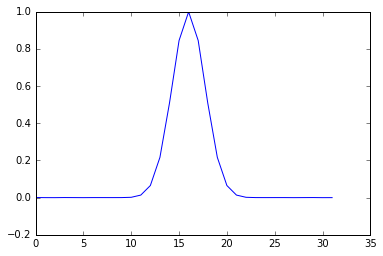

In [10]:
N_nolp_r = 32 // 2 +1
phi= wavelet_filters['phi'][0,:,:]
p = phi[0, :N_nolp_r] #.reshape(1, N_nolp_r)
p.shape
plt.plot(np.fft.fftshift(phi[0,]))
np.argmax(np.fft.fftshift(phi[0,]))

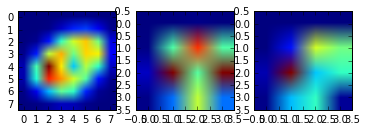

In [3]:
plt.subplot(1,3,1)
plt.imshow(I[0,:,:])
plt.subplot(1,3,2)
plt.imshow(Ifast[0,:,:])
plt.subplot(1,3,3)
plt.imshow(Ifastivan)
